<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/DL/CNN/lec04_2_image_arg_directory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6><b>Lec04. Image Argumentation (이미지 증강)</b></font><br>
tfds.image_classification.FashionMNIST
<br>
* ref : https://keras.io/api/preprocessing/image/
* ref : https://www.tensorflow.org/datasets/catalog/fashion_mnist
* ref : 홈페이지 : https://github.com/zalandoresearch/fashion-mnist
* ref : 소스 코드 : https://github.com/tensorflow/datasets/tree/master/tensorflow_datasets/image_classification/mnist.py



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Activation                 #-------------FC
from keras.layers import Conv2D, MaxPooling2D,Flatten      #-------------CNN
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.callbacks import EarlyStopping, ModelCheckpoint  #------------ callback

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# from sklearn.datasets import load_boston
from keras.datasets     import fashion_mnist


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
#(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)


# seed 고정

In [ ]:
np.random.seed(1234)
tf.random.set_seed(1234)

# Data Load

## 디렉토리별 파일 목록 확인

In [ ]:
import os 
FILE_PATH__ = "./img_jpg_mnist/train/0"
img_list = os.listdir(FILE_PATH__)  
print(len(img_list), img_list[:5])

30 ['1.jpg', '108.jpg', '114.jpg', '118.jpg', '119.jpg']


In [ ]:
for lbl_n in range(10):
    data_per_class=os.listdir('./img_jpg_mnist/train/'+str(lbl_n))
    print(f"{lbl_n} {len(data_per_class)} {data_per_class[:5]}")
    
for lbl_n in range(10):
    data_per_class=os.listdir('./img_jpg_mnist/test/'+str(lbl_n))
    print(f"{lbl_n} {len(data_per_class)}  {data_per_class[:5]}")

0 30 ['1.jpg', '108.jpg', '114.jpg', '118.jpg', '119.jpg']
1 30 ['102.jpg', '104.jpg', '105.jpg', '112.jpg', '113.jpg']
2 30 ['109.jpg', '117.jpg', '120.jpg', '122.jpg', '143.jpg']
3 30 ['10.jpg', '107.jpg', '111.jpg', '12.jpg', '130.jpg']
4 30 ['131.jpg', '139.jpg', '142.jpg', '150.jpg', '164.jpg']
5 30 ['0.jpg', '11.jpg', '132.jpg', '175.jpg', '182.jpg']
6 30 ['106.jpg', '129.jpg', '13.jpg', '147.jpg', '155.jpg']
7 30 ['103.jpg', '123.jpg', '140.jpg', '141.jpg', '15.jpg']
8 30 ['137.jpg', '144.jpg', '146.jpg', '17.jpg', '188.jpg']
9 30 ['110.jpg', '133.jpg', '154.jpg', '162.jpg', '170.jpg']
0 11  ['10.jpg', '101.jpg', '126.jpg', '13.jpg', '136.jpg']
1 11  ['14.jpg', '2.jpg', '29.jpg', '31.jpg', '37.jpg']
2 11  ['1.jpg', '106.jpg', '119.jpg', '147.jpg', '35.jpg']
3 11  ['18.jpg', '30.jpg', '32.jpg', '44.jpg', '51.jpg']
4 11  ['19.jpg', '24.jpg', '27.jpg', '33.jpg', '4.jpg']
5 11  ['102.jpg', '120.jpg', '127.jpg', '129.jpg', '15.jpg']
6 11  ['100.jpg', '11.jpg', '21.jpg', '22.jpg', '50

## 이미지 크기 확인

In [ ]:
from PIL import Image
 
image1 = Image.open('./img_jpg_mnist/train/0/1.jpg')
print(image1.size)
#image1 = image1.resize((28, 28))
image1

(28, 28)


# EDA

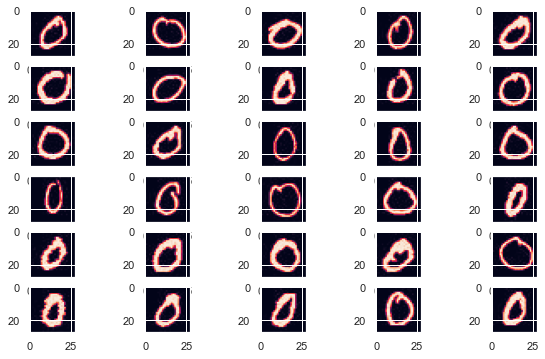

In [ ]:
columns = 5   
plt.figure(figsize=(10,10))
for i, img0 in enumerate(img_list):
    img0 = plt.imread(os.path.join(FILE_PATH__, img0))
    plt.subplot(10, columns, i + 1)
    plt.imshow(img0)

# 이미지 증강 : Directory로 가지고 있는 경우

* https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
* https://keras.io/ko/preprocessing/image/
* <font color=red size=4><b> ImageDataGenerator() --> generator.flow_from_directory(dir,batch_size=n)  --> fit() 또는 fit_generator() 또는 next()

# 증강 이미지 학습

In [ ]:
train_dir = './img_jpg_mnist/train'
test_dir = './img_jpg_mnist/test'

batch_size = 5

###################################################################################################
# train 증강 옵션 설정
train_datagen = ImageDataGenerator(#rescale = 1./255, # 정규화
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest',
                                   validation_split=0.2) # validation split 비율 설정

# train_dir 이미지 증강
train_generator = train_datagen.flow_from_directory(train_dir,                  # 디렉토리명  
                                                    target_size = (28, 28),   # 이미지 크기 변경
                                                    batch_size = batch_size,            # 배치 사이즈 지정
                                                    class_mode = 'categorical', # 클래스 모드 지정
                                                    subset='training')          # training data로 명시                         

###################################################################################################

# val 증강 (train 이미지 일부)
valid_generator = train_datagen.flow_from_directory(train_dir,                  #디렉토리명 
                                                    target_size = (28, 28),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    subset='validation')         # validation data로 설정

###################################################################################################

# test 증강 옵션 설정
test_datagen = ImageDataGenerator(rescale = 1./255) # test data에는 이미지 증강을 사용하지 않는다.


# test_dir 이미지 증강
test_generator = test_datagen.flow_from_directory(test_dir,                      # 디렉토리명  
                                                  target_size = (28, 28),
                                                  batch_size = batch_size,
                                                  class_mode = 'categorical')     

###################################################################################################


Found 240 images belonging to 10 classes.
Found 60 images belonging to 10 classes.
Found 110 images belonging to 10 classes.


<pre>
class_mode
  'categorical' : 'categorical_crossentropy' : 멀티-레이블 클래스인데, 원-핫 인코딩된 형태
  'sparse' : 'sparse_categorical_crossentropy' : 멀티-레이블 클래스인데, 레이블 인코딩된 형태
  'binary' : 'binary_crossentropy' : 이진 분류 클래스로, 0 또는 1인 형태

In [ ]:
input_shape = (28,28,1) #-----------------------------------★★★ 주의(Height, Width, Channel)
model = Sequential( [
        Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation="softmax")
        ] )

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# 학습
history = model.fit(train_generator,
                  steps_per_epoch = train_generator.samples//batch_size,    #---- 240//5  = 48                
                  epochs=100,
                  validation_data=valid_generator,
                  validation_steps = valid_generator.samples//batch_size)   #---- 60//5  = 12  

# # 평가
loss, accuracy = model.evaluate(test_generator,
                                steps = test_generator//batch_size)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100


UnimplementedError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "C:\AI\Python38\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\AI\Python38\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\AI\pythonProject\venv\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\AI\pythonProject\venv\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\AI\Python38\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\AI\Python38\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\AI\Python38\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\AI\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\AI\pythonProject\venv\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\AI\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\AI\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\AI\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\pc\AppData\Local\Temp/ipykernel_18552/752133482.py", line 2, in <module>
      history = model.fit(train_generator,
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\layers\convolutional.py", line 275, in call
      return self.activation(outputs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\activations.py", line 311, in relu
      return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\backend.py", line 4956, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_train_function_861]